#Importing libraries

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing


###Traning Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


###validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
with tf.device('/device:GPU:0'):
     cnn = tf.keras.models.Sequential()
     ###Building Convolution Layer
     cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(64,64,3)))
     cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
     cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
     cnn.add(tf.keras.layers.Flatten())
     cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
     cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))
     ##Compiling and Training Phase
     cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
     training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 19s 153ms/step - loss: 7.1219 - accuracy: 0.0501 - val_loss: 3.3481 - val_accuracy: 0.1225
Epoch 2/30
98/98 [==============================] - 16s 152ms/step - loss: 5.1205 - accuracy: 0.0770 - val_loss: 7.4000 - val_accuracy: 0.0883
Epoch 3/30
98/98 [==============================] - 17s 157ms/step - loss: 3.8872 - accuracy: 0.1274 - val_loss: 2.8758 - val_accuracy: 0.2735
Epoch 4/30
98/98 [==============================] - 17s 157ms/step - loss: 3.9024 - accuracy: 0.1547 - val_loss: 2.5898 - val_accuracy: 0.4359
Epoch 5/30
98/98 [==============================] - 17s 160ms/step - loss: 3.5151 - accuracy: 0.1968 - val_loss: 2.2634 - val_accuracy: 0.4587
Epoch 6/30
98/98 [==============================] - 17s 158ms/step - loss: 3.2191 - accuracy: 0.2565 - val_loss: 1.9439 - val_accuracy: 0.5014
Epoch 7/30
98/98 [==============================] - 17s 157ms/step - loss: 2.6509 - accuracy: 0.3210 - val_loss: 2.5307 - val_accuracy: 0.3020

Saving Model

In [7]:
     cnn.save('trained_model.h5')

In [12]:
training_history.history #returning dictionary of loss and accuracy

{'loss': [7.121906280517578,
  5.120465278625488,
  3.887190341949463,
  3.902374744415283,
  3.5150668621063232,
  3.2191150188446045,
  2.6508591175079346,
  2.3512966632843018,
  2.271418809890747,
  1.930277705192566,
  1.9489668607711792,
  1.6290099620819092,
  1.6195827722549438,
  1.4305624961853027,
  1.536219835281372,
  1.2309499979019165,
  1.2731552124023438,
  1.073509931564331,
  1.244958519935608,
  1.2053507566452026,
  0.8787282705307007,
  0.931659460067749,
  1.2133783102035522,
  0.9867075681686401,
  0.9206293821334839,
  0.8791765570640564,
  0.7605543732643127,
  0.81792813539505,
  1.0006245374679565,
  0.6505861878395081],
 'accuracy': [0.05008025839924812,
  0.07704655081033707,
  0.12744782865047455,
  0.15473514795303345,
  0.1967897266149521,
  0.25650081038475037,
  0.3210272789001465,
  0.39101123809814453,
  0.4638844430446625,
  0.5370786786079407,
  0.5707865357398987,
  0.609630823135376,
  0.6449438333511353,
  0.6754413843154907,
  0.69598716497421

In [13]:
#Recoding the training history
import json
with open('training_history.json','w') as f:
    json.dump(str(training_history.history),f)

Calculating Accuracy of Model achieved on validation data

In [19]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
print("Validation set Accuracy {}% ".format(training_history.history['val_accuracy'][-1] * 100)) #returning the last validation accuracy

Validation set Accuracy 95.15669345855713% 


Accuracy visualization

Training Visualization


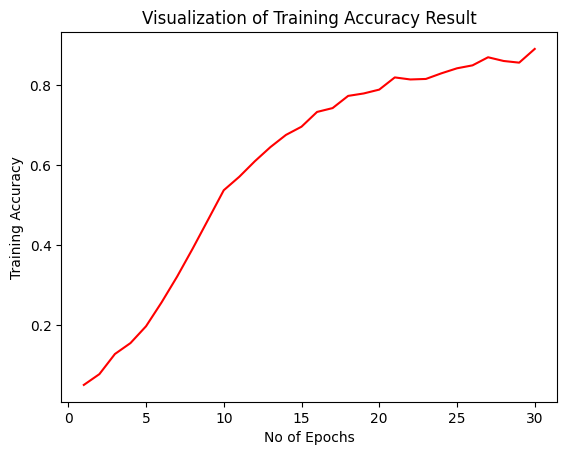

In [29]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'], color="red")
plt.title('Visualization of Training Accuracy Result')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.show()

Validation Accuracy Visualization

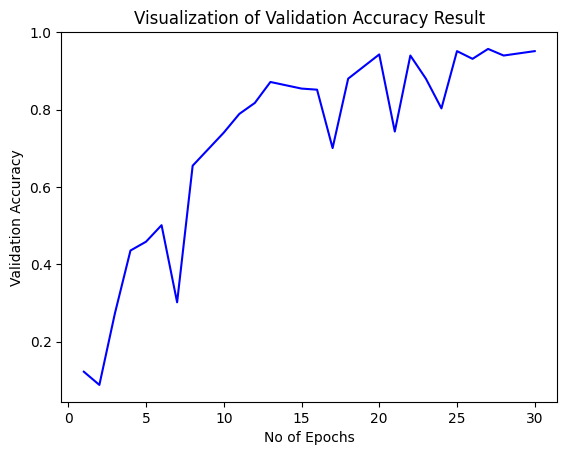

In [30]:
plt.plot(epochs,training_history.history['val_accuracy'], color="blue")
plt.title('Visualization of Validation Accuracy Result')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.show()